In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('medical_examination.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Add an overweight column to the data. 
To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
If that value is > 25 then the person is overweight. 
Use the value 0 for NOT overweight and the value 1 for overweight.

In [20]:
# df['BMI'] = (df['weight'] / ((df['height'] / 100) ** 2)
# df['overweight'] = df['BMI'] > 25
# df['overweight'].replace({True: 1, False: 0})
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2) ) > 25).replace({True: 1, False: 0}) 


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,1


### Normalize data by making 0 always good and 1 always bad. 
#### If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
#### If the value is more than 1, make the value 1.

In [23]:
df.loc[(df['cholesterol'] == 1), 'cholesterol'] = 0
df.loc[(df['gluc'] == 1), 'gluc'] = 0
df.loc[(df['cholesterol'] > 1), 'cholesterol'] = 1
df.loc[(df['gluc'] > 1), 'gluc'] = 1
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


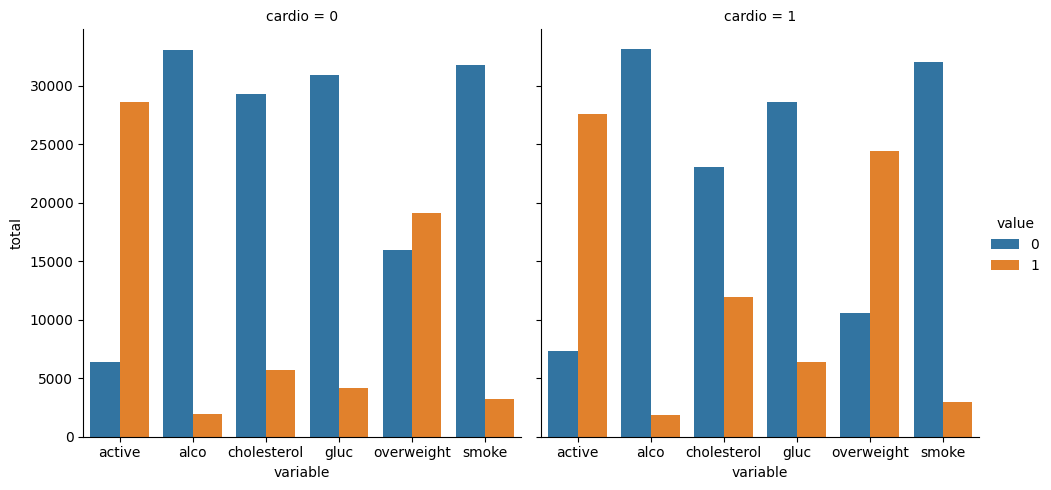

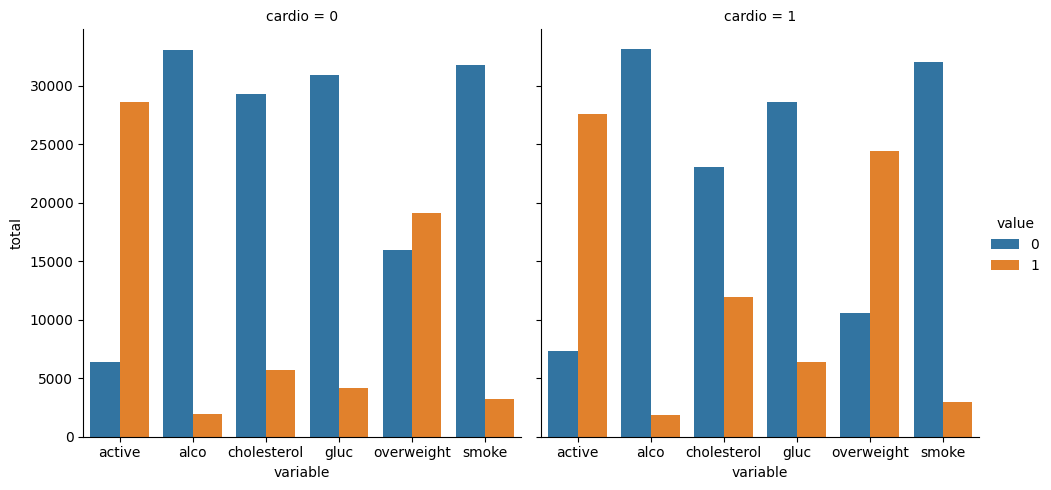

In [24]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 
    # 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(id_vars = 'cardio', 
                     value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
                     value_name='value')


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat = pd.DataFrame({'total':df_cat.groupby(['cardio', 'variable'])['value'].value_counts()})\
                                     .rename(columns={'cardio':'Cardio','variable':'Variable', 'value':'Value'})\
                                     .reset_index()
    

    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(data=df_cat, x='variable', y='total', col='cardio', kind='bar', hue='value')


    # Get the figure for the output
    fig = catplot.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

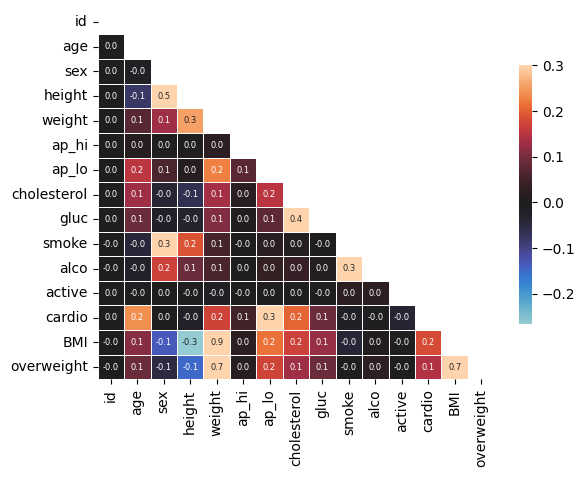

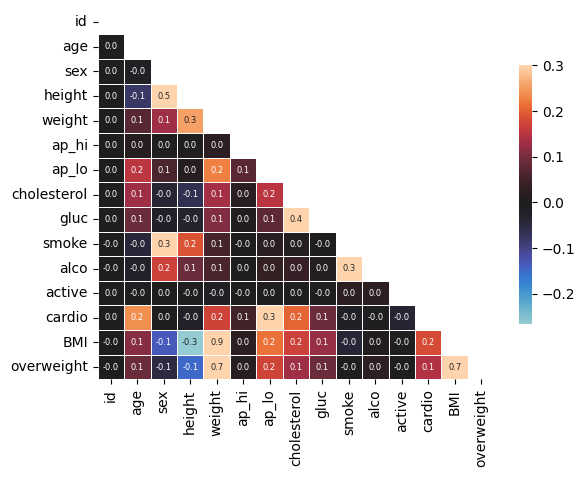

In [26]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = \
        df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_heat.corr(), dtype=bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(data=corr, 
                annot=True, 
                fmt=".1f", 
                linewidth=.5, 
                mask=mask, 
                annot_kws={'fontsize':6}, 
                cbar_kws={"shrink": .7}, 
                square=False, 
                center=0, 
                vmax=0.30)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()